#### Classification Using Perceptron

We will be building a simple classification model using perceptrons

#### Bootstrap All Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#### Define the Class

In [45]:
# The Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=50, random_state=42) -> None:
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        random_generator = np.random.RandomState(self.random_state)
        # self.w_ = random_generator.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.w_ = np.zeros(X.shape[1])

        self.b_ = np.float_(0.)
        self.errors_ = []

        for i in range(self.epochs):
            n_errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update

                if update != 0.0:
                    n_errors += 1

            print('Epoch: {}, Errors: {}, Weights: {}, Bias: {}'.format(i, n_errors, self.w_, self.b_))
            self.errors_.append(n_errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


#### Define The Sythetic Data

In [6]:
x1 = np.arange(0, 20)
x2 = np.arange(100, 120)

In [8]:
X = np.transpose([x1, x2])
X

array([[  0, 100],
       [  1, 101],
       [  2, 102],
       [  3, 103],
       [  4, 104],
       [  5, 105],
       [  6, 106],
       [  7, 107],
       [  8, 108],
       [  9, 109],
       [ 10, 110],
       [ 11, 111],
       [ 12, 112],
       [ 13, 113],
       [ 14, 114],
       [ 15, 115],
       [ 16, 116],
       [ 17, 117],
       [ 18, 118],
       [ 19, 119]])

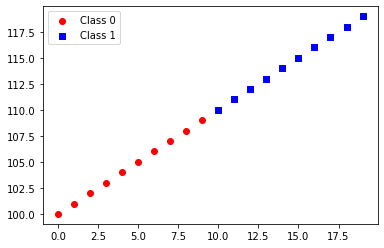

In [20]:
fig, ax = plt.subplots()
ax.scatter(X[0:10, 0], X[0:10, 1], color='red', label='Class 0', marker='o')
ax.scatter(X[10:20, 0], X[10:20, 1], color='blue', label='Class 1', marker='s')
ax.legend()

In [9]:
y = np.append(np.zeros(10), np.ones(10))

In [21]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

#### Fit The Model

In [46]:
ppn = Perceptron(learning_rate=0.1, epochs=100)

In [47]:
ppn.fit(X, y)

Epoch: 0, Errors: 2, Weights: [1. 1.], Bias: 0.0
Epoch: 1, Errors: 2, Weights: [2. 2.], Bias: 0.0
Epoch: 2, Errors: 2, Weights: [3. 3.], Bias: 0.0
Epoch: 3, Errors: 2, Weights: [4. 4.], Bias: 0.0
Epoch: 4, Errors: 2, Weights: [5. 5.], Bias: 0.0
Epoch: 5, Errors: 2, Weights: [6. 6.], Bias: 0.0
Epoch: 6, Errors: 2, Weights: [7. 7.], Bias: 0.0
Epoch: 7, Errors: 2, Weights: [8. 8.], Bias: 0.0
Epoch: 8, Errors: 2, Weights: [9. 9.], Bias: 0.0
Epoch: 9, Errors: 2, Weights: [10. 10.], Bias: 0.0
Epoch: 10, Errors: 3, Weights: [10.9  0.9], Bias: -0.1
Epoch: 11, Errors: 2, Weights: [11.9  1.9], Bias: -0.1
Epoch: 12, Errors: 2, Weights: [12.9  2.9], Bias: -0.1
Epoch: 13, Errors: 2, Weights: [13.9  3.9], Bias: -0.1
Epoch: 14, Errors: 2, Weights: [14.9  4.9], Bias: -0.1
Epoch: 15, Errors: 2, Weights: [15.9  5.9], Bias: -0.1
Epoch: 16, Errors: 2, Weights: [16.9  6.9], Bias: -0.1
Epoch: 17, Errors: 2, Weights: [17.9  7.9], Bias: -0.1
Epoch: 18, Errors: 2, Weights: [18.9  8.9], Bias: -0.1
Epoch: 19, Er

#### Plot The Decision Regions

In [31]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    fig, ax = plt.subplots()
    ax.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

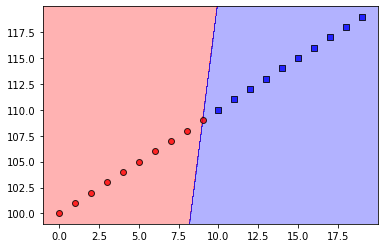

In [32]:
plot_decision_regions(X, y, ppn)

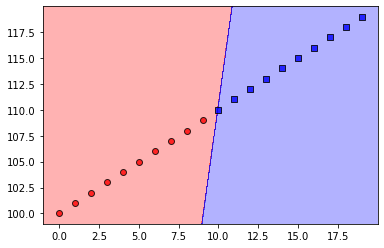

In [48]:
plot_decision_regions(X, y, ppn)

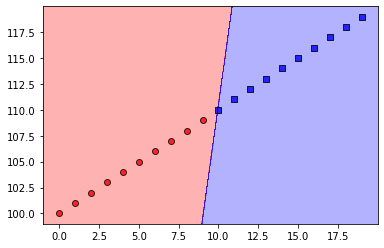

In [40]:
plot_decision_regions(X, y, ppn)

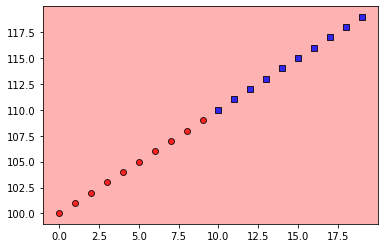

In [44]:
plot_decision_regions(X, y, ppn)